In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
'''

it is quite difficult to find out the responsible paramenters for left column which are directly affecting it.'''

'\n\nit is quite difficult to find out the responsible paramenters for left column which are directly affecting it.'

In [8]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
'''
1. satisfaction _level
2.average_monthly_hours
3. promotion_last_5years

'''

'\n1. satisfaction _level\n2.average_monthly_hours\n3. promotion_last_5years\n\n'

<AxesSubplot:xlabel='salary'>

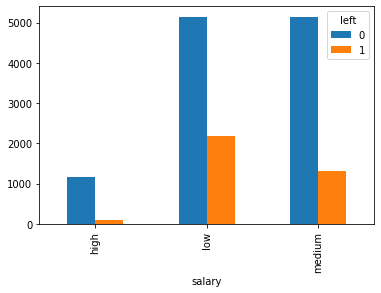

In [15]:
pd.crosstab(data['salary'],data['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

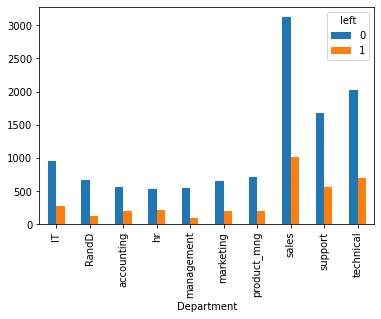

In [19]:
pd.crosstab(data['Department'],data['left']).plot(kind='bar')

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [60]:
x = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']].values
x

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [61]:
y = data[['left']]
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('salary',OneHotEncoder,[0])],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('salary',
                                 <class 'sklearn.preprocessing._encoders.OneHotEncoder'>,
                                 [0])])

In [63]:
x = ct.fit_transform(x)
x

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years
12766,0.75,227,0
3536,0.13,149,0
10295,0.67,226,0
2137,0.52,199,0
14774,0.10,291,0
...,...,...,...
13123,0.52,270,0
3264,0.59,209,0
9845,0.69,259,0
10799,0.78,236,0


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
y_test

,left
1670,1
13378,0
10233,0
4719,0
7003,0
...,...
14035,0
8469,0
12453,1
9431,0


In [42]:
model.score(x_test,y_test)

0.77